In [131]:
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from typing import List, Tuple

In [133]:
# for preprocessing 
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder,OneHotEncoder
from sklearn.impute import SimpleImputer

# to split data 
from sklearn.model_selection import train_test_split, KFold 

# TO Evaluation 
from sklearn.metrics import accuracy_score , precision_score ,recall_score , f1_score
from sklearn.metrics import confusion_matrix , classification_report 

# classification models 
from sklearn.tree import DecisionTreeClassifier

In [161]:
df_bc = pd.read_csv("../datasets/breast-cancer-seer.csv")

In [162]:
df_bc

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,1,1,49,Alive
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,14,8,69,Alive
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69,Alive
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1,72,Alive


In [163]:
df_bc.columns = df_bc.columns.str.lower().str.replace(' ', '_')

In [164]:
df_bc

,age,race,marital_status,t_stage_,n_stage,6th_stage,differentiate,grade,a_stage,tumor_size,estrogen_status,progesterone_status,regional_node_examined,reginol_node_positive,survival_months,status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,1,1,49,Alive
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,14,8,69,Alive
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69,Alive
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1,72,Alive


In [165]:
df_bc["status"].unique()

array(['Alive', 'Dead'], dtype=object)

In [166]:
def fit_gaussian_to_feature(x_feat: pd.Series) -> Tuple[np.array]:
    # Compute mean and standard deviation
    mean = x_feat.mean()
    std_dev = x_feat.std()

    # Generate 1000 points between min and max of feature
    x = np.linspace(x_feat.min(), x_feat.max(), 1000) 

    # Compute Gaussian
    A = 1 / (std_dev * np.sqrt(2 * np.pi))
    gaussian_curve = A * np.exp(-0.5 * ((x - mean) / std_dev) ** 2)
    
    return x, gaussian_curve

In [167]:
# Plotting data of some numerical features
numerical_features = ["age", "tumor_size", "regional_node_examined", "survival_months"]

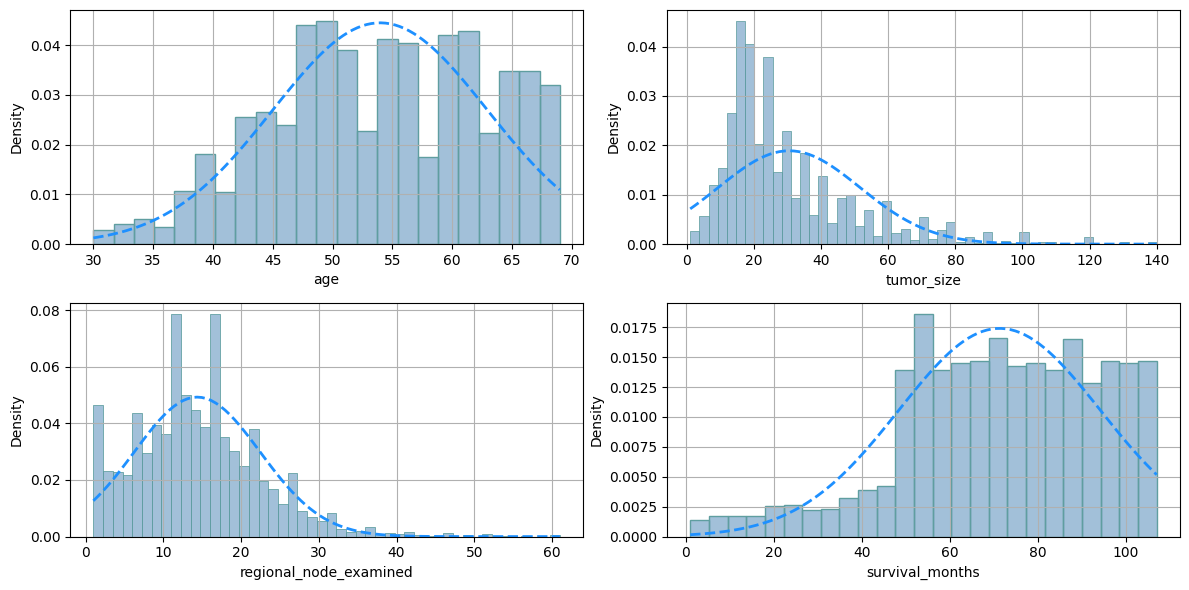

In [168]:
n_rows = 2
n_cols = 2
fig, ax = plt.subplots(n_rows, n_cols, figsize=(12,6))

# Flatten the 2D array of axes objects to simplify indexing
ax = ax.flatten()

for i, feature in enumerate(numerical_features):
    if i < len(ax):  # Make sure to only use the available axes
        # Plot the histogram
        sns.histplot(df_bc[feature], stat="density", ax=ax[i], color="steelblue", edgecolor="cadetblue", alpha=0.5)
        
        # Generate and plot the Gaussian curve
        x, gaussian_curve = fit_gaussian_feature(df_bc[feature])
        ax[i].plot(x, gaussian_curve, color="dodgerblue", linestyle="--", linewidth=2)  

        ax[i].grid(True, zorder=0)
        
# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

In [169]:
categorical_features = ["race", "marital_status", "t_stage_", "n_stage", "progesterone_status", "differentiate"]

In [170]:
def get_counts(df: pd.DataFrame, col_name: str):
    return df.groupby(col_name).size().reset_index(name="count")

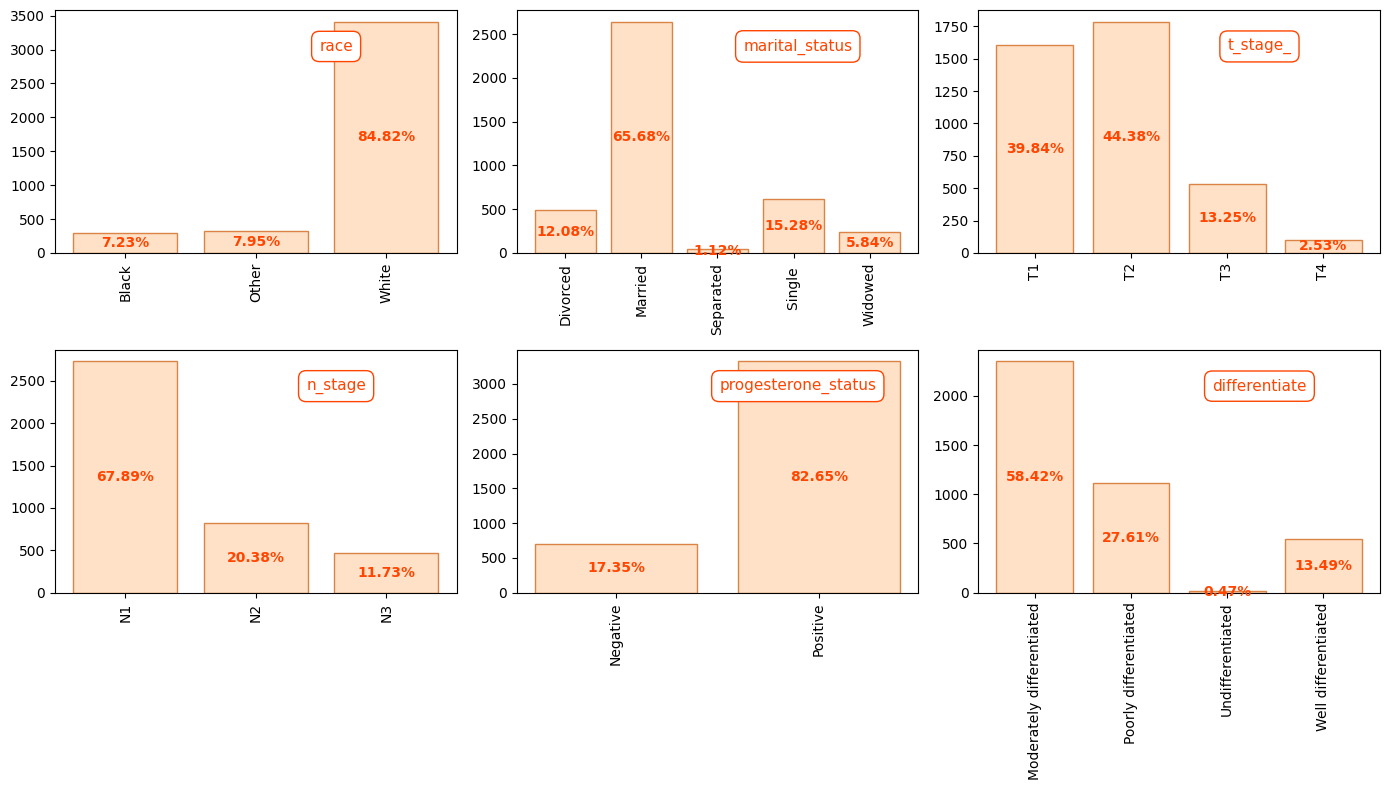

In [171]:
n_cols = 3
n_rows = len(categorical_features) // 3 

fig, ax  = plt.subplots(n_rows, n_cols, figsize=(14,8))

# Flatten the 2D array of axes objects to simplify indexing
ax = ax.flatten()

for i, feature in enumerate(categorical_features):
    
    df_counts = get_counts(df_bc, feature)
    percs = df_counts["count"]/df_counts["count"].sum()
    
    bars = ax[i].bar(df_counts[feature], df_counts["count"], color="peachpuff", edgecolor="chocolate", alpha=0.8)

    # Add text with a bounding box, using relative coordinates
    ax[i].text(
        0.7, 0.85, 
        feature,
        fontsize=11,
        color="orangered",
        ha='center', va='center',
        transform=ax[i].transAxes, 
        bbox=dict(
            facecolor='white', edgecolor='orangered', 
            boxstyle='round,pad=0.5')
        )
    
    # filling bars    
    for j, bar in enumerate(bars):
        x = bar.get_x()
        width = bar.get_width()
        height = bar.get_height()
        ax[i].text(
            x+width/2, 
            height/2, 
            f"{str(round(percs[j]*100, 2))}%", 
            ha="center", va="center", color="orangered", fontsize=10, fontweight="bold"
        )

    ax[i].set_xticklabels(df_counts[feature], rotation=90)
# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

In [181]:
numerical_features_new = ["age", "tumor_size", "regional_node_examined"]

In [182]:
# Step 1: Select the categorical features and apply one-hot encoding
df_encoded = pd.get_dummies(df_bc[categorical_features], drop_first=True)

# Step 2: Select the numerical features
df_numerical = df_bc[numerical_features_new]

# Step 3: Combine both numerical and encoded categorical features into a new DataFrame
df_final = pd.concat([df_numerical, df_encoded], axis=1)

# Now df_final can be used to fit a decision tree
print(df_final.head())  # Display the first few rows of the combined DataFrame

   age  tumor_size  regional_node_examined  race_Other  race_White  \
0   68           4                      24       False        True   
1   50          35                      14       False        True   
2   58          63                      14       False        True   
3   58          18                       2       False        True   
4   47          41                       3       False        True   

   marital_status_Married  marital_status_Separated  marital_status_Single   \
0                    True                     False                   False   
1                    True                     False                   False   
2                   False                     False                   False   
3                    True                     False                   False   
4                    True                     False                   False   

   marital_status_Widowed  t_stage__T2  t_stage__T3  t_stage__T4  n_stage_N2  \
0                   Fals

In [183]:
# Split your data into features (X) and target variable (y)
X = df_final  # Features
y = df_bc["status"]  # Replace with your actual target variable

In [184]:
x_train , x_test , y_train , y_test = train_test_split(X,y , test_size=0.2 ,shuffle=True ,
                                                      random_state= 43 , stratify=y)

In [193]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [194]:
tree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

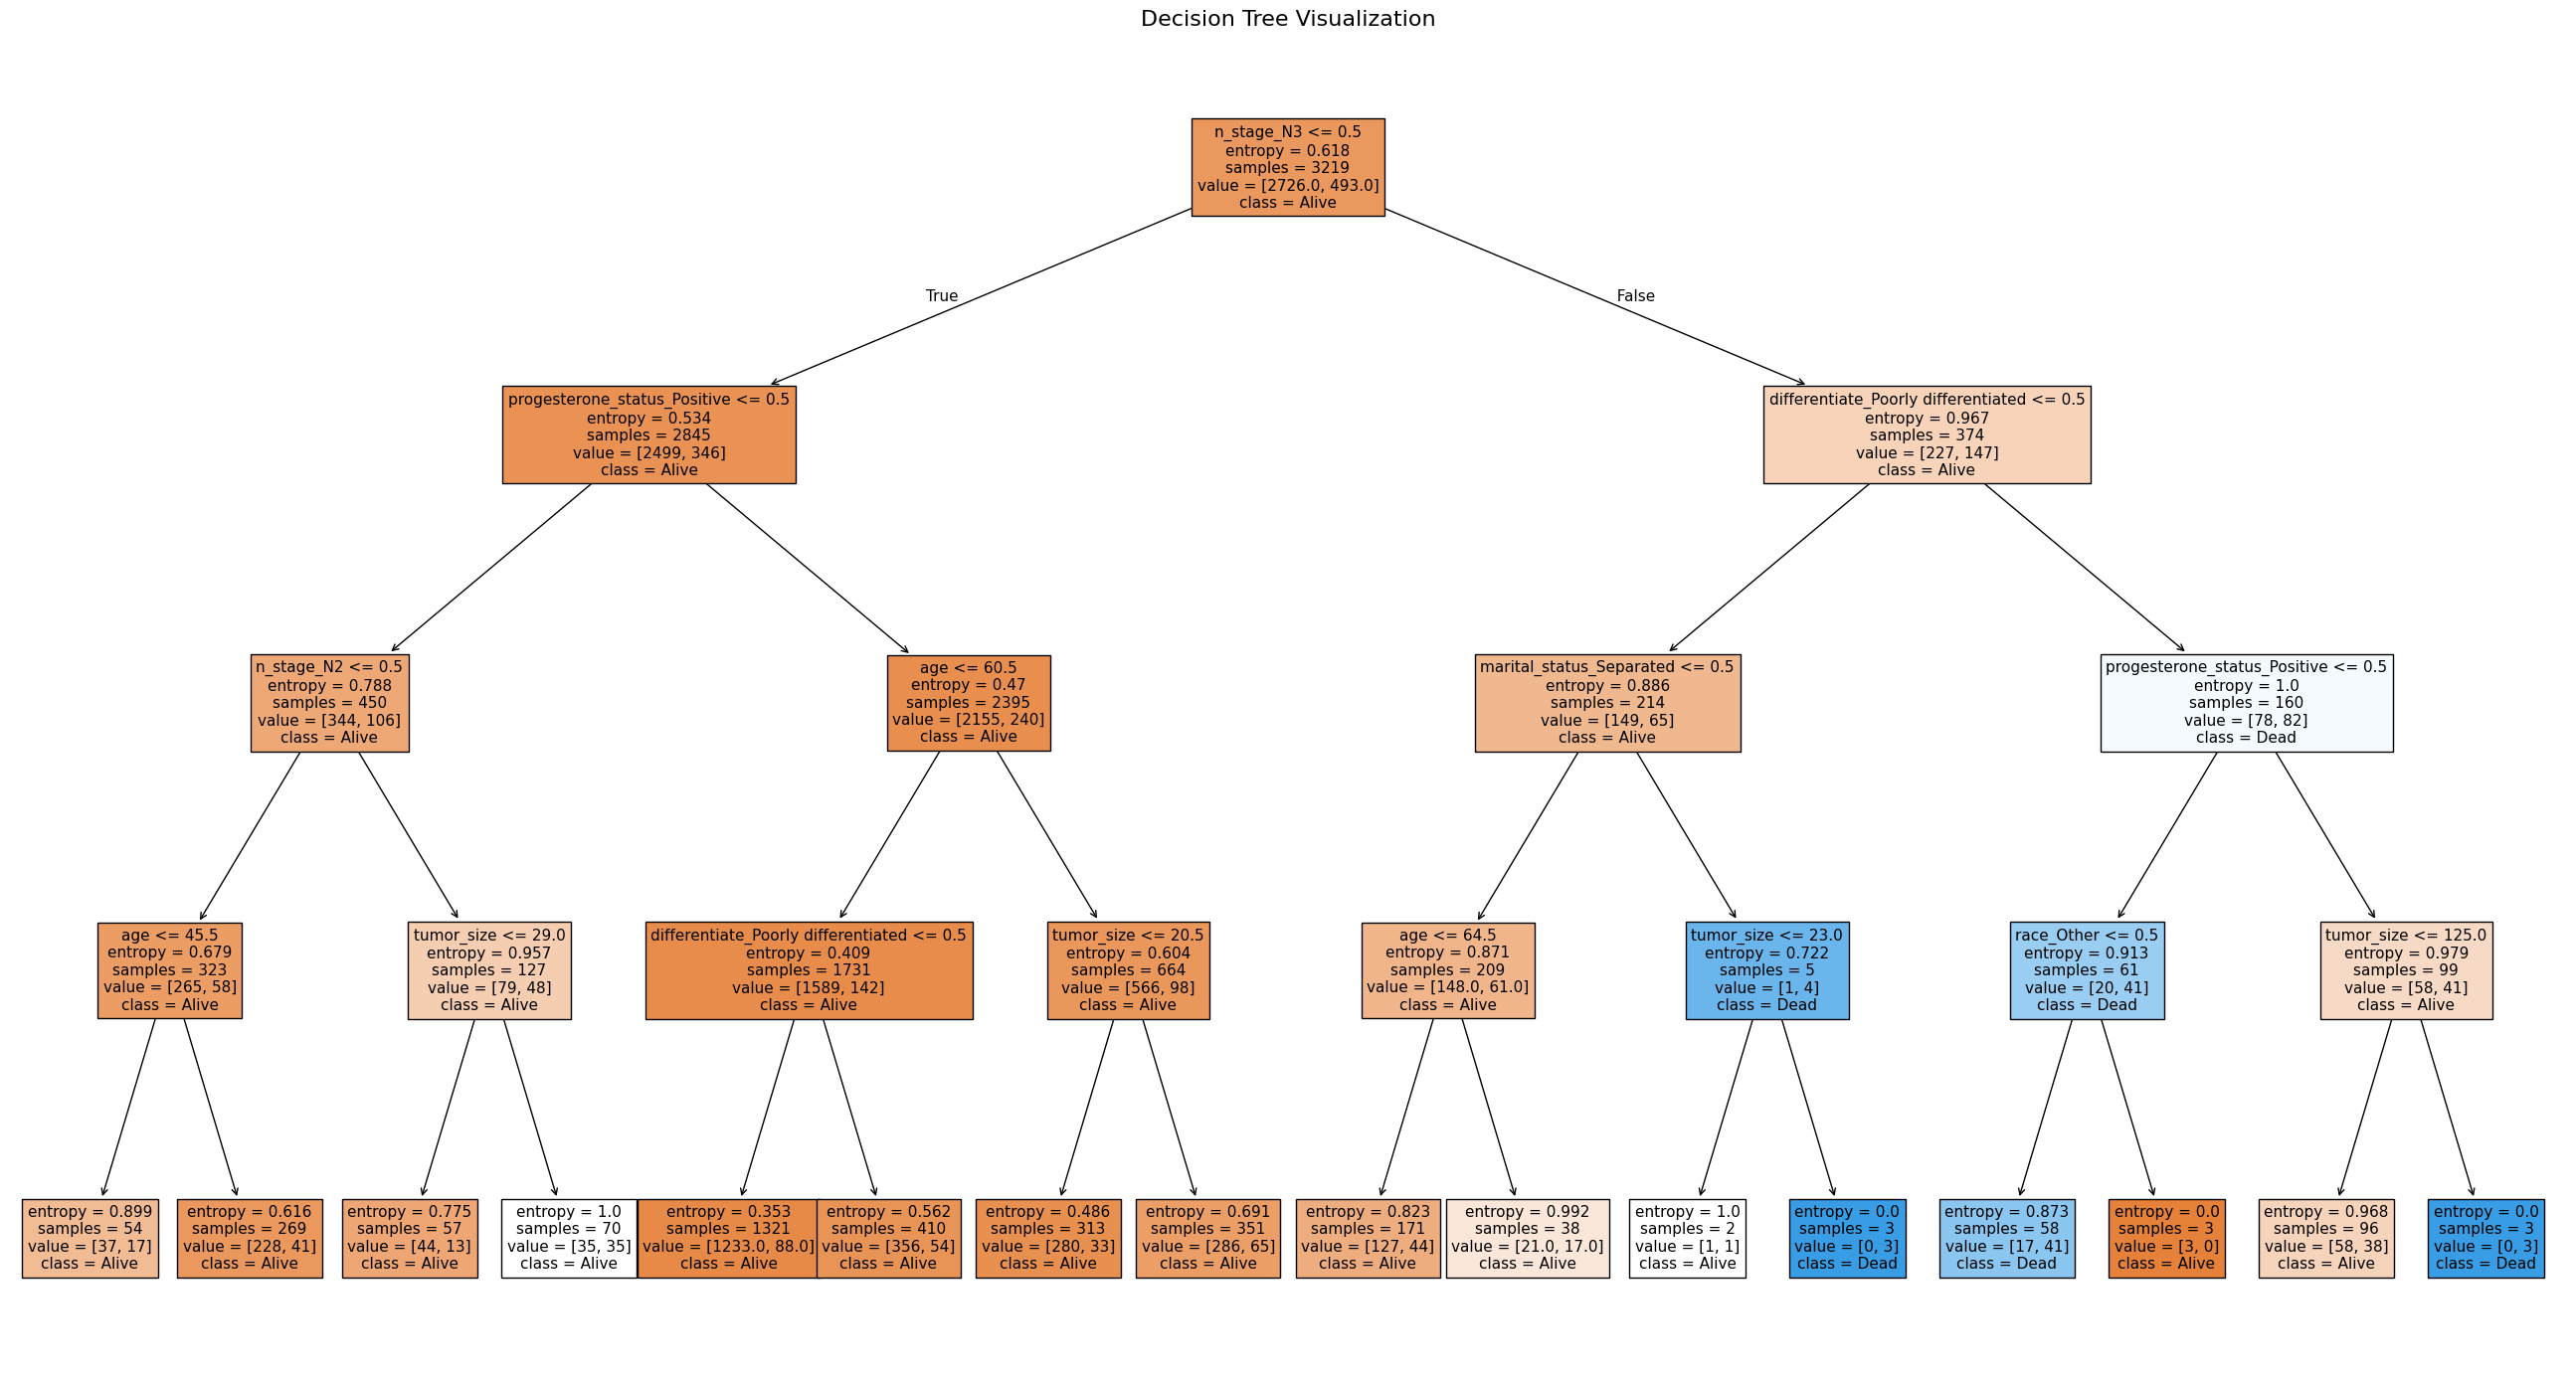

In [195]:
from sklearn.tree import plot_tree

# Convert class names to strings
class_names = [str(cls) for cls in tree.classes_]

# Plotting the decision tree
# Create a figure with increased size
# Create a larger figure
plt.figure(figsize=(26, 14))  # Increase figure size for better spacing

# Plot the decision tree
plot_tree(tree, 
          filled=True, 
          feature_names=x_train.columns, 
          class_names=[str(cls) for cls in tree.classes_],
          fontsize=11,  # Adjust font size
          proportion=False)  # Set to False to keep node sizes standard

plt.title('Decision Tree Visualization', fontsize=16)
plt.tight_layout()  # Adjust layout to fit everything properly
plt.show()

In [196]:
# Step 3: Make predictions
y_pred = tree.predict(x_test)

# Step 4: Calculate accuracy and F1-score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')  # Use 'macro' or 'micro' as appropriate for your task

# Print the results
print(f'Accuracy: {accuracy:.2f}')
print(f'F1 Score: {f1:.2f}')

Accuracy: 0.85
F1 Score: 0.80
